In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels
from heatmapannot import heatmapannot


%load_ext autoreload
%autoreload 2

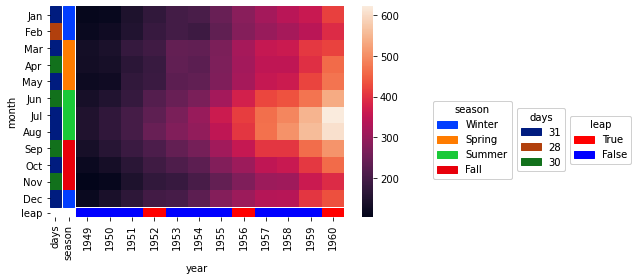

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from heatmapannot import heatmapannot

#load "flights" dataset
df = sns.load_dataset("flights")

# Add some features to month and year
monthToSeason = {"Jan":"Winter", "Feb":"Winter", "Mar":"Spring", "Apr":"Spring", "May":"Spring",
                "Jun":"Summer", "Jul":"Summer", "Aug":"Summer", "Sep":"Fall", "Oct":"Fall", "Nov":"Fall",
                "Dec":"Winter"}
monthToDays = {"Jan":31, "Feb":28, "Mar":31, "Apr":30, "May":31,
                "Jun":30, "Jul":31, "Aug":31, "Sep":30, "Oct":31, "Nov":30,
                "Dec":31}
df["season"] = df["month"].map(monthToSeason)
df["days"] = df["month"].map(monthToDays)
df["leap"] = df["year"].map(lambda x: x%4==0)
heatmapdf = df.pivot("month", "year", "passengers")

# Plot the heatmap
sns.heatmap(heatmapdf)
heatmapannot.AddHeatmapAnnot(data=df, heatmap_row="month", heatmap_col="year",
                            row_features = ["season", "days"], col_features = ["leap"],
                            row_palettes = ["bright", "dark"], col_colormaps = [{True:"r", False:"b"}])
plt.tight_layout()